In [275]:
# IMPORT LIBRARIES

import os
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
%matplotlib inline 

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import performance metrics/measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# from imblearn.under_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [276]:
# Load training and validation datasets
train_df = pd.read_csv("ztrain_dataset_final1.csv") 
val_df = pd.read_csv("zvalidate_dataset_final.csv") 

In [277]:
# Preview
print("Train shape:", train_df.shape)
print(train_df.head())

Train shape: (25247, 27)
   Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  ...  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
0      2      0  ...   20750.63   2000.21      0.00   1134.85   1821.78   
1     -2     -2  ...    1350.30      0.00      0.17      0.00   2700.10   
2      0      0  ...   52991.51   2086.94   2199.99   1845.66   2000.35   
3      0      0  ...   76945.47   3348.07   3380.91   3400.45   2683.97   
4     -2     -2  ...       1.35    999.78   3186.27  45027.78   2100.09   

   pay_amt5  pay_amt6  AVG_Bill_amt  PAY_TO_BILL_ratio  next_month_defaul

In [278]:
train_df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [279]:
# Check for missing values
print(train_df.isnull().sum())

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64


In [280]:
# Impute missing AGE values with median
median_age = train_df["age"].median()
train_df["age"].fillna(median_age, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22300\3952060715.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["age"].fillna(median_age, inplace=True)


In [281]:
train_df = train_df.drop(columns=["Customer_ID"])
train_df = train_df.rename(columns={"pay_0": "pay_1"})
#val_df = val_df.drop(columns=["Customer_ID"], errors='ignore')
val_df = val_df.rename(columns={"pay_0": "pay_1"})

In [282]:
train_df['marriage'].value_counts()

marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64

In [283]:
train_df['education'].value_counts()

education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64

In [284]:
# Keep only valid values in 'marriage' (1,2,3)
train_df = train_df[train_df['marriage'].isin([1, 2, 3])]

# Keep only valid values in 'education' (1,2,3,4)
train_df = train_df[train_df['education'].isin([1, 2, 3, 4])]


In [285]:
# One-hot encode categorical columns
categorical_cols = ['sex', 'marriage', 'education']

train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
val_df = pd.get_dummies(val_df, columns=categorical_cols, drop_first=True)

# Backup Customer_ID column
customer_ids = val_df['Customer_ID']

# Now drop it from val_df before aligning
val_df = val_df.drop(columns=['Customer_ID'])

# Align columns
train_df, val_df = train_df.align(val_df, join='left', axis=1, fill_value=0)


In [286]:
train_df.head()

,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,...,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,sex_1,marriage_2,marriage_3,education_2,education_3,education_4
0,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,...,1500.24,41511.50,0.03,0,False,True,False,True,False,False
1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,...,1349.72,2534.50,0.27,0,True,True,False,False,False,False
2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,...,1999.78,50422.00,0.04,0,False,False,False,True,False,False
3,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,...,2892.10,86229.50,0.04,0,True,False,False,True,False,False
4,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,...,0.27,11814.33,0.72,0,False,True,False,False,False,False


In [287]:
train_df.shape

(24883, 29)

In [288]:
# Separate target and features
y_train = train_df['next_month_default']
X_train = train_df.drop(columns=['next_month_default'])

#y_val = val_df['next_month_default']
X_val = val_df.drop(columns=['next_month_default'])

In [289]:
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Max payment delay (worst behavior)
X_train['max_delay'] = X_train[pay_cols].max(axis=1)
X_val['max_delay'] = X_val[pay_cols].max(axis=1)

# Average payment delay
X_train['avg_delay'] = X_train[pay_cols].mean(axis=1)
X_val['avg_delay'] = X_val[pay_cols].mean(axis=1)

# Count of months with delay (>=1)
X_train['delay_count'] = (X_train[pay_cols] >= 1).sum(axis=1)
X_val['delay_count'] = (X_val[pay_cols] >= 1).sum(axis=1)

# Count of on-time full payments (-1)
X_train['ontime_count'] = (X_train[pay_cols] == -1).sum(axis=1)
X_val['ontime_count'] = (X_val[pay_cols] == -1).sum(axis=1)

# Count of months with no credit usage (-2)
X_train['no_usage_count'] = (X_train[pay_cols] == -2).sum(axis=1)
X_val['no_usage_count'] = (X_val[pay_cols] == -2).sum(axis=1)


In [290]:
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

# Average bill amount
X_train['avg_bill_amt'] = X_train[bill_cols].mean(axis=1)
X_val['avg_bill_amt'] = X_val[bill_cols].mean(axis=1)

# Average payment amount
X_train['avg_pay_amt'] = X_train[pay_amt_cols].mean(axis=1)
X_val['avg_pay_amt'] = X_val[pay_amt_cols].mean(axis=1)

# Bill to payment ratio per month (sum of bills / sum of payments)
X_train['bill_to_pay_ratio'] = X_train[bill_cols].sum(axis=1) / (X_train[pay_amt_cols].sum(axis=1) + 1e-5)
X_val['bill_to_pay_ratio'] = X_val[bill_cols].sum(axis=1) / (X_val[pay_amt_cols].sum(axis=1) + 1e-5)

# Count of months with overpayment (bill < 0)
X_train['overpay_months'] = (X_train[bill_cols] < 0).sum(axis=1)
X_val['overpay_months'] = (X_val[bill_cols] < 0).sum(axis=1)

# Count of months with no spending (bill == 0)
X_train['no_spend_months'] = (X_train[bill_cols] == 0).sum(axis=1)
X_val['no_spend_months'] = (X_val[bill_cols] == 0).sum(axis=1)


In [291]:
X_train['credit_utilization'] = X_train['avg_bill_amt'] / (X_train['LIMIT_BAL'] + 1e-5)
X_val['credit_utilization'] = X_val['avg_bill_amt'] / (X_val['LIMIT_BAL'] + 1e-5)



In [292]:
# Step 1: Calculate correlation matrix for numeric features only
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
corr_matrix = X_train[numeric_cols].corr().abs()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


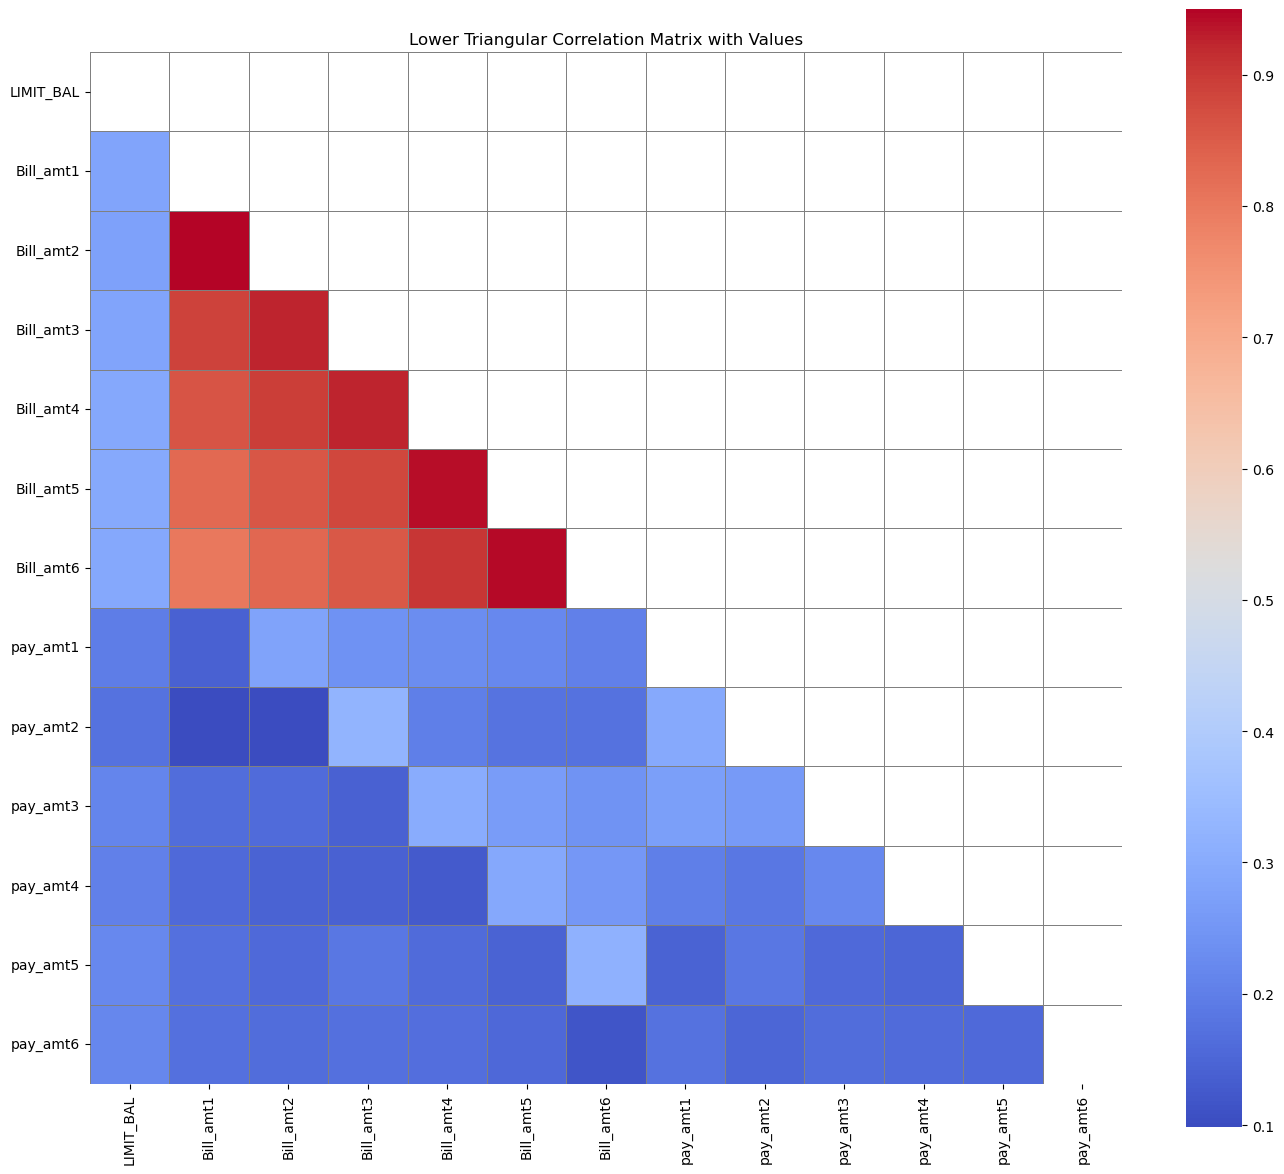

In [293]:
original_numeric_cols = [
    'LIMIT_BAL','Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
]
# Compute correlation matrix
corr_matrix = X_train[original_numeric_cols].corr().abs()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,         # Annotate with correlation values
    fmt='.2f',          # 2 decimal places
    square=True,
    cbar=True,
    linewidths=0.5,
    linecolor='grey'
)
plt.title('Lower Triangular Correlation Matrix with Values')
plt.tight_layout()
plt.show()

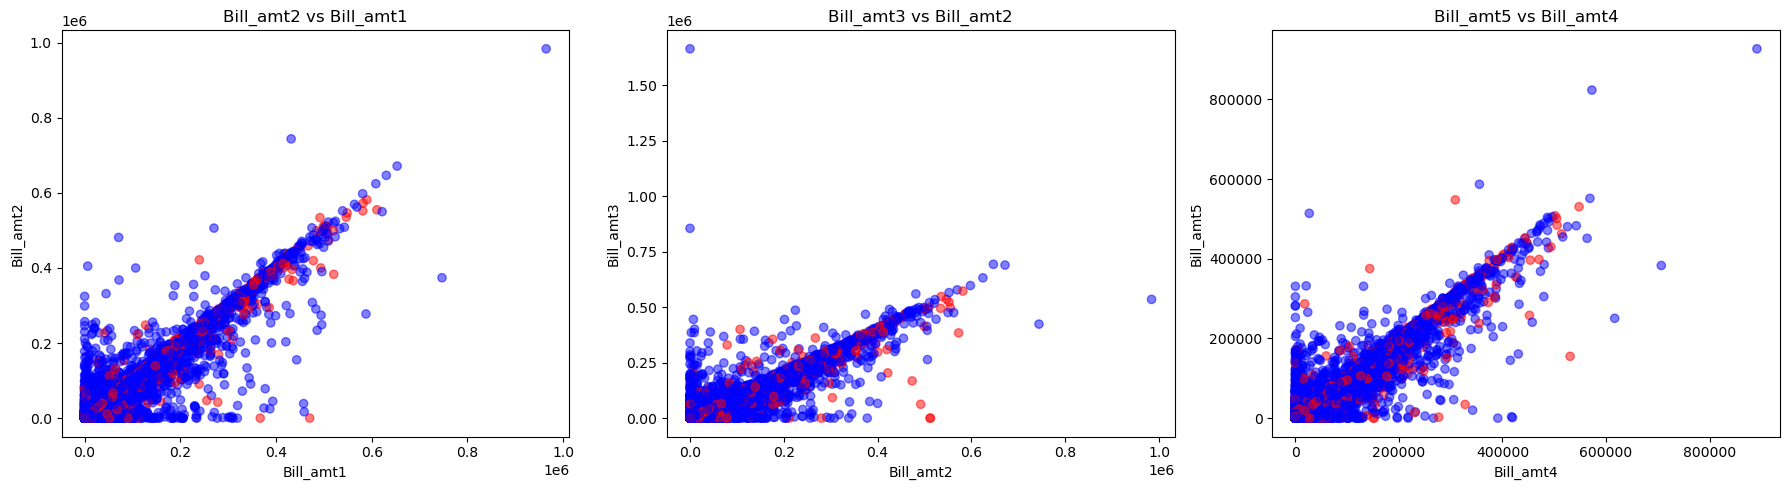

In [294]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Extract values
bill_amt1 = np.array(X_train['Bill_amt1'])
bill_amt2 = np.array(X_train['Bill_amt2'])
bill_amt3 = np.array(X_train['Bill_amt3'])
bill_amt4 = np.array(X_train['Bill_amt4'])
bill_amt5 = np.array(X_train['Bill_amt5'])

# Use y_train for coloring
colors = ['red' if d == 1 else 'blue' for d in y_train]

# Plot 1: Bill_amt2 vs Bill_amt1
axes[0].scatter(bill_amt1, bill_amt2, c=colors, alpha=0.5)
axes[0].set_xlabel('Bill_amt1')
axes[0].set_ylabel('Bill_amt2')
axes[0].set_title('Bill_amt2 vs Bill_amt1')

# Plot 2: Bill_amt3 vs Bill_amt2
axes[1].scatter(bill_amt2, bill_amt3, c=colors, alpha=0.5)
axes[1].set_xlabel('Bill_amt2')
axes[1].set_ylabel('Bill_amt3')
axes[1].set_title('Bill_amt3 vs Bill_amt2')

# Plot 3: Bill_amt5 vs Bill_amt4
axes[2].scatter(bill_amt4, bill_amt5, c=colors, alpha=0.5)
axes[2].set_xlabel('Bill_amt4')
axes[2].set_ylabel('Bill_amt5')
axes[2].set_title('Bill_amt5 vs Bill_amt4')

plt.tight_layout()
plt.show()


In [295]:
#Red dots = Defaulters

In [296]:
X_train.shape

(24883, 39)

In [297]:
X_train.head()

,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,...,avg_delay,delay_count,ontime_count,no_usage_count,avg_bill_amt,avg_pay_amt,bill_to_pay_ratio,overpay_months,no_spend_months,credit_utilization
0,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,...,1.000000,3,0,0,41511.498333,1326.185000,31.301439,0,0,0.691858
1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,...,-0.833333,0,1,2,2535.076667,674.998333,3.755678,0,1,0.008742
2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,...,0.000000,0,0,0,50421.683333,2009.286667,25.094320,0,0,0.280120
3,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,...,0.000000,0,0,0,86229.755000,3074.916667,28.042957,0,0,0.410618
4,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,...,-2.000000,0,0,6,11814.253333,8552.366667,1.381402,0,0,0.042194


In [298]:
X_train.columns

Index(['LIMIT_BAL', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4',
       'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
       'sex_1', 'marriage_2', 'marriage_3', 'education_2', 'education_3',
       'education_4', 'max_delay', 'avg_delay', 'delay_count', 'ontime_count',
       'no_usage_count', 'avg_bill_amt', 'avg_pay_amt', 'bill_to_pay_ratio',
       'overpay_months', 'no_spend_months', 'credit_utilization'],
      dtype='object')

In [299]:
X_train.duplicated().sum()



792

In [300]:
X_train = X_train.drop_duplicates()
y_train = y_train.loc[X_train.index]  


In [301]:
X_train.shape

(24091, 39)

In [302]:
y_train.value_counts(normalize=True)


next_month_default
0    0.801503
1    0.198497
Name: proportion, dtype: float64

In [303]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [304]:
# Use the same X_train and y_train
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  

from xgboost import XGBClassifier
model_weighted = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
model_weighted.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [305]:
from sklearn.model_selection import train_test_split
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

In [306]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

y_pred = model_weighted.predict(X_train_test)

precision = precision_score(y_train_test, y_pred)
recall = recall_score(y_train_test, y_pred)
f1 = f1_score(y_train_test, y_pred)
f2 = fbeta_score(y_train_test, y_pred, beta=2)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"F2 Score:  {f2:.4f}")


Precision: 0.7184
Recall:    0.9279
F1 Score:  0.8098
F2 Score:  0.8768


In [307]:
from lightgbm import LGBMClassifier

# Compute class weight manually (same as before)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Define and train the model
lgbm_model = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 4782, number of negative: 19309
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4873
[LightGBM] [Info] Number of data points in the train set: 24091, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.198497 -> initscore=-1.395712
[LightGBM] [Info] Start training from score -1.395712


LGBMClassifier(random_state=42, scale_pos_weight=4.037850271852781)

In [308]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

y_pred_lgbm = lgbm_model.predict(X_train_test)

precision = precision_score(y_train_test, y_pred_lgbm)
recall = recall_score(y_train_test, y_pred_lgbm)
f1 = f1_score(y_train_test, y_pred_lgbm)
f2 = fbeta_score(y_train_test, y_pred_lgbm, beta=2)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"F2 Score:  {f2:.4f}")


Precision: 0.5550
Recall:    0.7962
F1 Score:  0.6541
F2 Score:  0.7326


In [309]:
from xgboost import XGBClassifier

# Train on the full labeled data
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

final_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
final_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [310]:
X_val.columns

Index(['LIMIT_BAL', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4',
       'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
       'sex_1', 'marriage_2', 'marriage_3', 'education_2', 'education_3',
       'education_4', 'max_delay', 'avg_delay', 'delay_count', 'ontime_count',
       'no_usage_count', 'avg_bill_amt', 'avg_pay_amt', 'bill_to_pay_ratio',
       'overpay_months', 'no_spend_months', 'credit_utilization'],
      dtype='object')

In [347]:
val_df.columns

Index(['LIMIT_BAL', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4',
       'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
       'next_month_default', 'sex_1', 'marriage_2', 'marriage_3',
       'education_2', 'education_3', 'education_4'],
      dtype='object')

In [351]:
val_df_raw = pd.read_csv("zvalidate_dataset_final.csv")  # or whatever your file is
customer_ids = val_df_raw['Customer_ID']


In [353]:
val_df = val_df_raw.drop(columns=['Customer_ID'])
val_df = val_df.rename(columns={'pay_0': 'pay_1'})


In [355]:
val_df = val_df.drop(columns=['next_month_default'], errors='ignore')


In [357]:
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
val_df['max_delay'] = val_df[pay_cols].max(axis=1)
val_df['avg_delay'] = val_df[pay_cols].mean(axis=1)
val_df['delay_count'] = (val_df[pay_cols] >= 1).sum(axis=1)
val_df['ontime_count'] = (val_df[pay_cols] == -1).sum(axis=1)
val_df['no_usage_count'] = (val_df[pay_cols] == -2).sum(axis=1)

val_df['avg_bill_amt'] = val_df[[f'Bill_amt{i}' for i in range(1, 7)]].mean(axis=1)
val_df['avg_pay_amt'] = val_df[[f'pay_amt{i}' for i in range(1, 7)]].mean(axis=1)
val_df['bill_to_pay_ratio'] = val_df['avg_bill_amt'] / (val_df['avg_pay_amt'] + 1)
val_df['credit_utilization'] = val_df['avg_bill_amt'] / (val_df['LIMIT_BAL'] + 1)
val_df['overpay_months'] = (val_df[[f'Bill_amt{i}' for i in range(1, 7)]] < 0).sum(axis=1)
val_df['no_spend_months'] = (val_df[[f'Bill_amt{i}' for i in range(1, 7)]] == 0).sum(axis=1)


In [359]:
val_df = pd.get_dummies(val_df, columns=['sex', 'marriage', 'education'], drop_first=True)


In [365]:
X_train, val_df = X_train.align(val_df, join='left', axis=1, fill_value=0)


In [367]:
y_val_pred = final_model.predict(val_df)

submission = pd.DataFrame({
    'Customer_ID': customer_ids,
    'next_month_default': y_val_pred
})

submission.to_excel("submission_XXXXXXXX.xlsx", index=False)


In [369]:
pd.Series(y_val_pred).value_counts()


0    3761
1    1255
Name: count, dtype: int64

In [373]:
from sklearn.metrics import precision_score, recall_score, fbeta_score

y_probs = final_model.predict_proba(X_train)[:, 1]

for thresh in np.arange(0.4, 0.8, 0.01):
    y_thresh = (y_probs >= thresh).astype(int)
    precision = precision_score(y_train, y_thresh)
    recall = recall_score(y_train, y_thresh)
    f2 = fbeta_score(y_train, y_thresh, beta=2)
    print(f"Threshold: {thresh:.2f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F2: {f2:.3f}")


Threshold: 0.40 | Precision: 0.598 | Recall: 0.973 | F2: 0.865
Threshold: 0.41 | Precision: 0.610 | Recall: 0.969 | F2: 0.867
Threshold: 0.42 | Precision: 0.621 | Recall: 0.967 | F2: 0.870
Threshold: 0.43 | Precision: 0.633 | Recall: 0.962 | F2: 0.872
Threshold: 0.44 | Precision: 0.644 | Recall: 0.957 | F2: 0.873
Threshold: 0.45 | Precision: 0.657 | Recall: 0.953 | F2: 0.874
Threshold: 0.46 | Precision: 0.670 | Recall: 0.948 | F2: 0.875
Threshold: 0.47 | Precision: 0.682 | Recall: 0.942 | F2: 0.875
Threshold: 0.48 | Precision: 0.693 | Recall: 0.936 | F2: 0.875
Threshold: 0.49 | Precision: 0.702 | Recall: 0.930 | F2: 0.873
Threshold: 0.50 | Precision: 0.712 | Recall: 0.923 | F2: 0.871
Threshold: 0.51 | Precision: 0.722 | Recall: 0.917 | F2: 0.870
Threshold: 0.52 | Precision: 0.732 | Recall: 0.909 | F2: 0.867
Threshold: 0.53 | Precision: 0.743 | Recall: 0.899 | F2: 0.863
Threshold: 0.54 | Precision: 0.754 | Recall: 0.893 | F2: 0.861
Threshold: 0.55 | Precision: 0.762 | Recall: 0.887 | F2

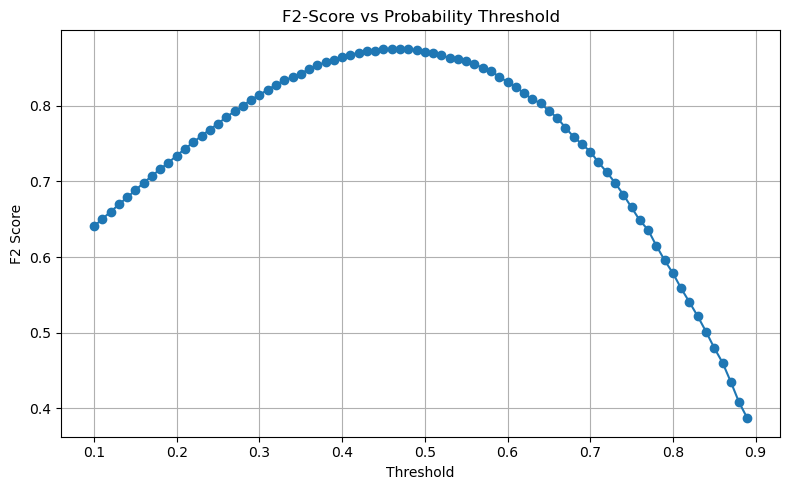

In [377]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score

y_probs = final_model.predict_proba(X_train)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    f2 = fbeta_score(y_train, y_pred_thresh, beta=2)
    f2_scores.append(f2)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f2_scores, marker='o')
plt.title('F2-Score vs Probability Threshold')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.grid(True)
plt.tight_layout()
plt.show()
